<a href="https://colab.research.google.com/github/Ngaisah/MachineLearning/blob/main/Praktikum2_machine_G231210061.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [2]:
df= pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
cat_col = [col for col in df.columns if df [col].dtype == 'object']
print('Categorical column :', cat_col)
num_col = [col for col in df.columns if df [col].dtype != 'object']
print('Numerical column :', cat_col)

Categorical column : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical column : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [7]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [8]:
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [9]:
df1= df.drop(columns=['Name','Ticket'])
df1.shape

(891, 10)

In [10]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [11]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace= True)
df2.shape

(889, 9)

In [12]:
df3 = df2.fillna(df2.Age.mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

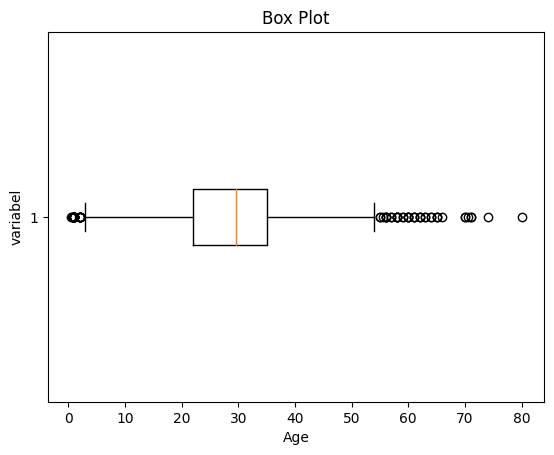

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(df3['Age'], vert=False)
plt.ylabel('variabel')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [14]:
#Calculate summary statistics
mean = df3['Age'].mean()
std = df3['Age'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
print('Lower Bound :' , lower_bound)
print('Upper Bound :' , upper_bound)
# Drop the outliers
df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]

Lower Bound : 3.7054001079256587
Upper Bound : 55.57878528533277


In [15]:
#create two new variables X and Y
X = df3[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = df3['Survived']

In [16]:
from sklearn.preprocessing import MinMaxScaler
# initialising the MinMaxScaler
scaler = MinMaxScaler (feature_range=(0, 1))
# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1 [num_col_])
x1.head()

<ipython-input-16-0c664a78f0b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1 [num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


In [25]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn. preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard (2).csv


In [26]:
#load the data set.
data = pd.read_csv('creditcard.csv')
# print info about columns in the dataframe
print(data)

     Time        V1        V2        V3        V4        V5        V6  \
0       0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1       0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2       1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
..    ...       ...       ...       ...       ...       ...       ...   
994   751  1.284612  0.303073 -0.067909  0.930684  0.117387 -0.487005   
995   751 -0.654892  0.608319  1.585102 -3.009429  0.037593 -1.954023   
996   752 -2.101171 -0.227365  1.624668 -0.291123  1.902446 -1.483921   
997   753 -1.248163  0.315246  3.708935  0.687280 -0.873071  1.091287   
998   755  1.374134 -1.767210 -0.433352 -2.229552  0.331135  3.924775   

           V7        V8        V9  ...       V21       V22       V23  \
0    0.239599  0.098698  0.363787  ... -0.018307  0

In [20]:
#print info about columns in the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   V1          999 non-null    float64
 1   V2          999 non-null    float64
 2   V3          999 non-null    float64
 3   V4          999 non-null    float64
 4   V5          999 non-null    float64
 5   V6          999 non-null    float64
 6   V7          999 non-null    float64
 7   V8          999 non-null    float64
 8   V9          999 non-null    float64
 9   V10         999 non-null    float64
 10  V11         999 non-null    float64
 11  V12         999 non-null    float64
 12  V13         999 non-null    float64
 13  V14         999 non-null    float64
 14  V15         999 non-null    float64
 15  V16         999 non-null    float64
 16  V17         999 non-null    float64
 17  V18         999 non-null    float64
 18  V19         999 non-null    float64
 19  V20         999 non-null    f

In [30]:
#drop Time and Amount columns
data = data.drop(['Time', 'Amount'], axis = 1)

#as you can see there are 492 fraud transactions
data['Class'].value_counts()

0    997
1      2
Name: Class, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

#split into 70:30 ration
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

#describe info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (622, 7)
Number transactions y_train dataset:  (622,)
Number transactions X_test dataset:  (267, 7)
Number transactions y_test dataset:  (267,)


In [40]:
from sklearn.preprocessing import LabelEncoder

#encode the categorical values in the 'Sex_male' column into numerical values
label_encoder = LabelEncoder()
X_train['Sex'] = label_encoder.fit_transform(X_train['Sex'])
X_test['Sex'] = label_encoder.transform(X_test['Sex'])

#perform one-hot encoding on the 'Embarked' column of the training and testing datasets
X_train = pd.get_dummies(X_train, columns=['Embarked'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Embarked'], drop_first=True)


In [41]:
#logistic regression object
lr = LogisticRegression()

lr.fit(X_train, Y_train.ravel())

predictions = lr.predict(X_test)

#print classification report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       157
           1       0.76      0.67      0.71       110

    accuracy                           0.78       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267



In [43]:
#Using Smote Algorithm
print("Before Oversampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before Oversampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

#import SMOTE module from imblearn library
#pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

print('After Oversampling, the shape of train_X : {}'.format(X_train_res.shape))
print('After Oversampling, the shape of train_Y : {} \n'.format(Y_train_res.shape))

print("After Oversampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After Oversampling, counts of label '0': {} ".format)

Before Oversampling, counts of label '1': 230
Before Oversampling, counts of label '0': 392 

After Oversampling, the shape of train_X : (784, 8)
After Oversampling, the shape of train_Y : (784,) 

After Oversampling, counts of label '1': 392
<built-in method format of str object at 0x7b98f5b67b70>


In [44]:
#logistic regression object
lr1 = LogisticRegression()

lr1.fit(X_train_res, Y_train_res.ravel())

predictions = lr1.predict(X_test)

#print classification report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       157
           1       0.70      0.75      0.72       110

    accuracy                           0.76       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.76      0.77       267



In [45]:
#NearMiss Algorithm
print("Before Undersampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

#apply NearMiss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, Y_train_miss = sm.fit_resample(X_train, Y_train.ravel())

print('After Undersampling, the shape of train_X : {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_Y : {} \n'.format(Y_train_miss.shape))

print("After Undersampling, counts of label '1': {}".format(sum(Y_train_miss == 1)))
print("After Undersampling, counts of label '0': {} ".format(sum(Y_train_miss== 0)))


Before Undersampling, counts of label '1': 230
Before Undersampling, counts of label '0': 392 

After Undersampling, the shape of train_X : (784, 8)
After Undersampling, the shape of train_Y : (784,) 

After Undersampling, counts of label '1': 392
After Undersampling, counts of label '0': 392 


In [46]:
#logistic regression object
lr2 = LogisticRegression()

lr2.fit(X_train_miss, Y_train_miss.ravel())

predictions = lr2.predict(X_test)

#print classification report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       157
           1       0.70      0.75      0.72       110

    accuracy                           0.76       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.76      0.77       267

